In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("P:\Projects\medical insurance\insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

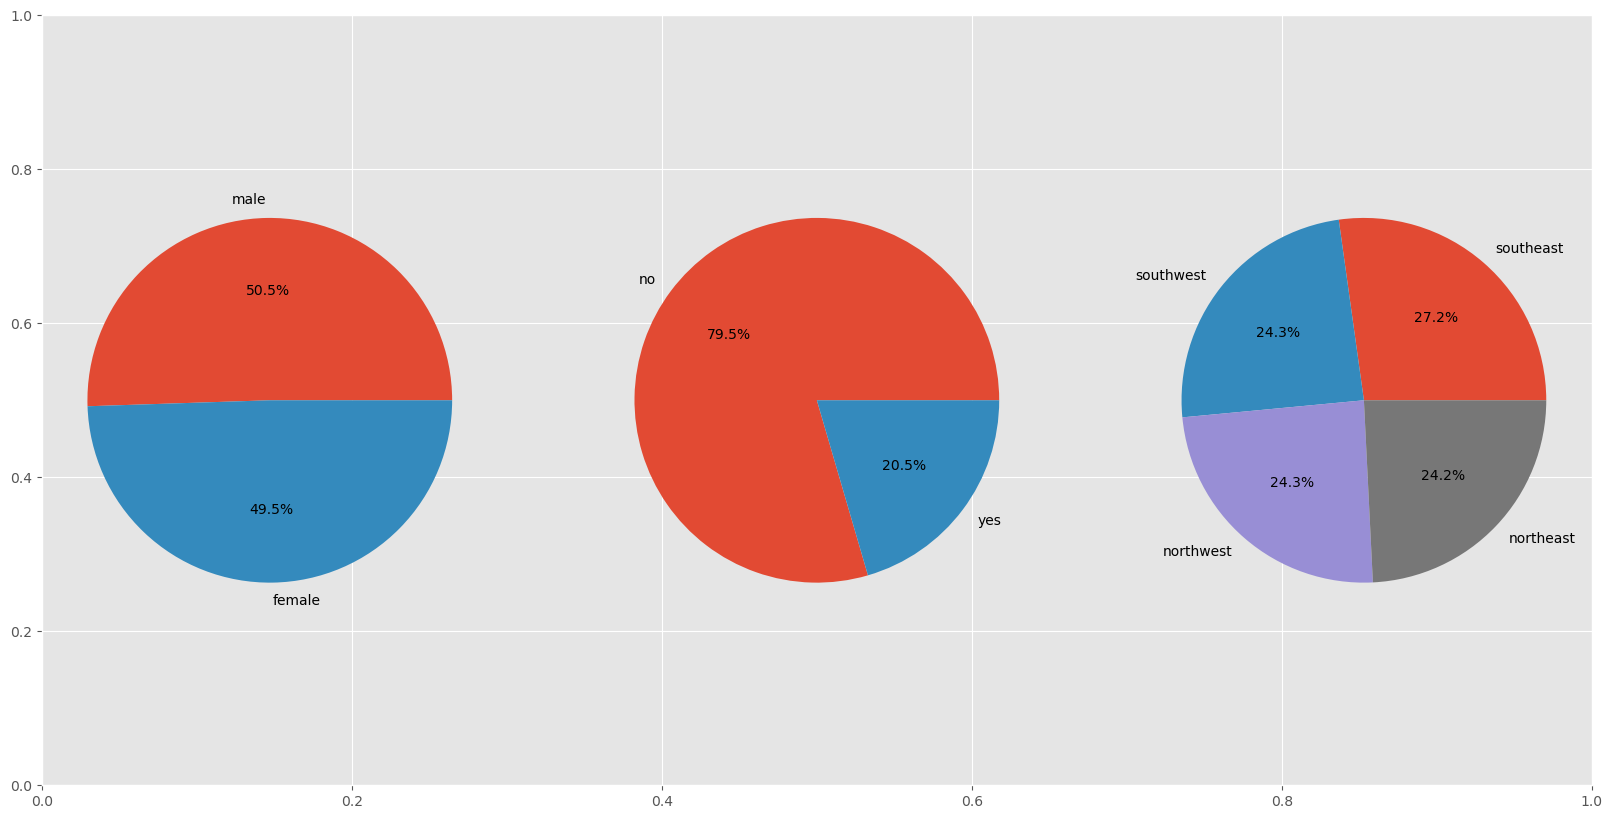

In [11]:
features = ['sex','smoker', 'region']
plt.subplots(figsize = (20, 10))

for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    
    x = df[col].value_counts()
    plt.pie(x.values, labels = x.index, autopct = "%1.1f%%")

plt.show()

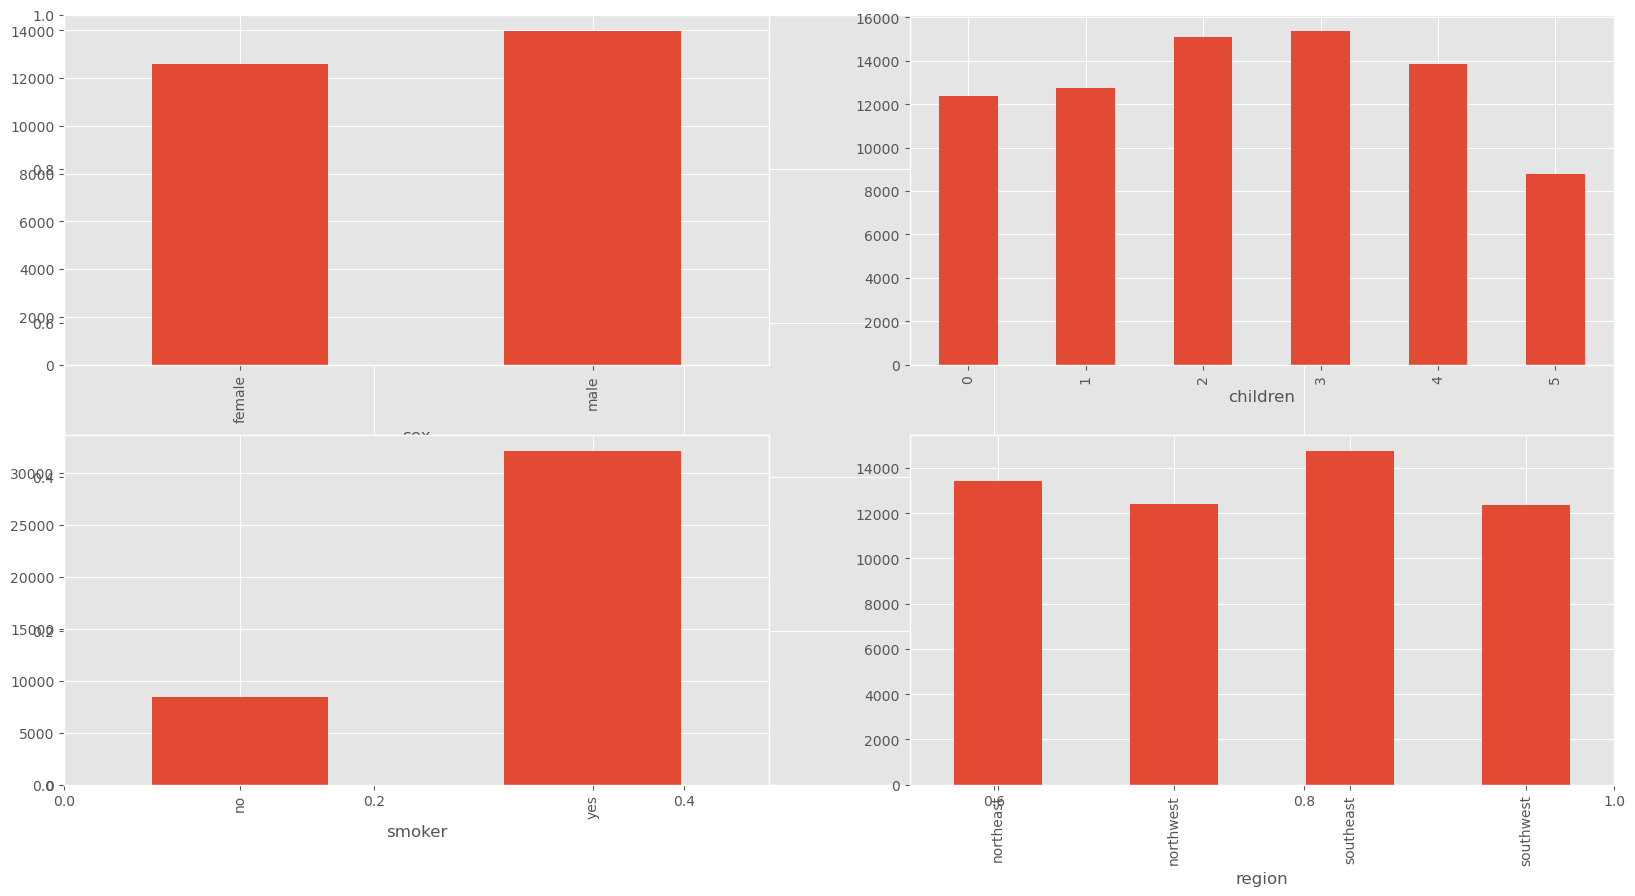

In [12]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize = (20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

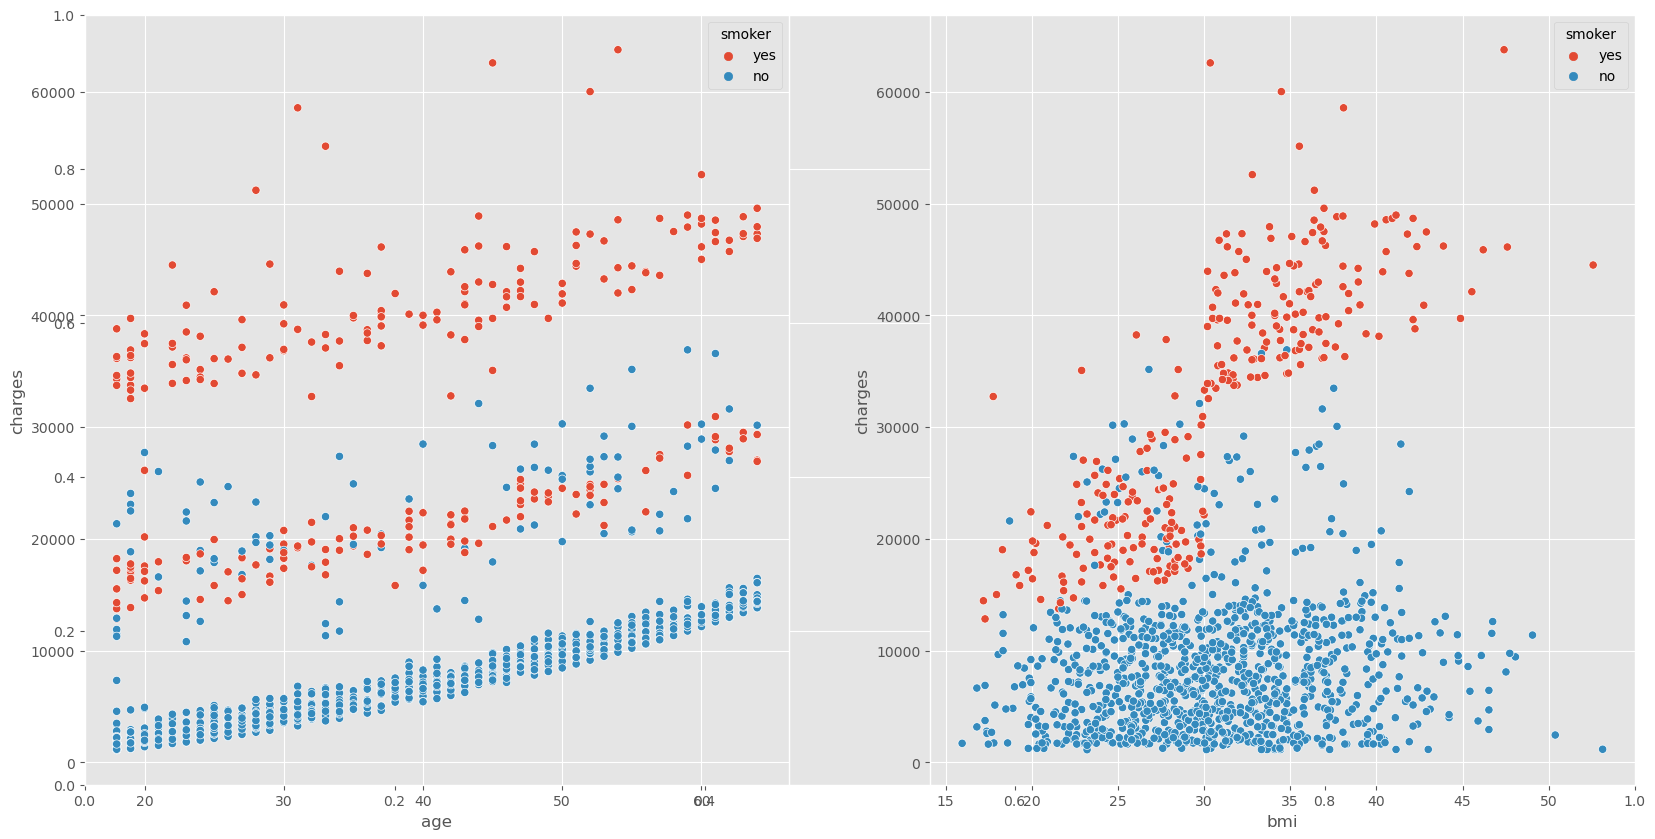

In [13]:
features = ['age', 'bmi']

plt.subplots(figsize = (20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data = df, x = col, y = 'charges', hue = 'smoker')
plt.show()

In [14]:
df.drop_duplicates(inplace=True)

<Axes: >

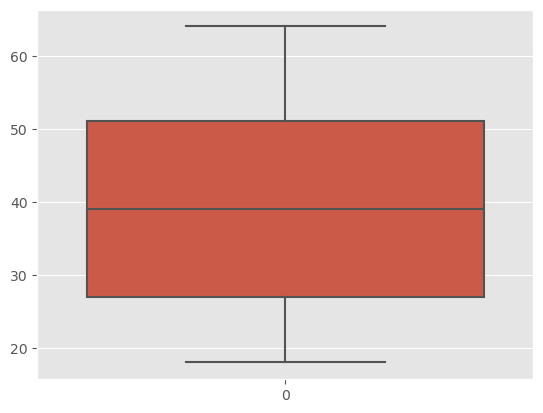

In [15]:
sns.boxplot(df['age'])

<Axes: >

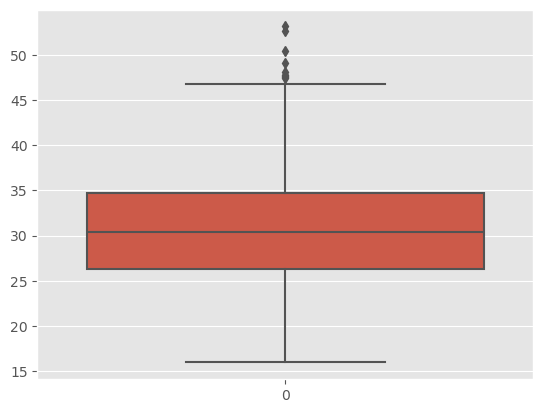

In [16]:
sns.boxplot(df['bmi'])

In [17]:
Q1 = df['bmi'].quantile(0.25)
Q2 = df['bmi'].quantile(0.50)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

13.674999999999994
47.31500000000001


In [20]:
!pip install feature-engine


   ---------------------------------------- 0.0/378.6 kB ? eta -:--:--
   ------ --------------------------------- 61.4/378.6 kB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 276.5/378.6 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 378.6/378.6 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.6 MB 9.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.6 MB 8.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.6 MB 6.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/11.6 MB 7.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.7/11.6 MB 6.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.6 MB 6.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.5/11.6 MB 7.0 MB/s eta 0:00:02
   --------

In [21]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb = ArbitraryOutlierCapper(min_capping_dict={'bmi': 13.674999999999994}, max_capping_dict = {'bmi': 47.31500000000001})

df[['bmi']] = arb.fit_transform(df[['bmi']])

<Axes: >

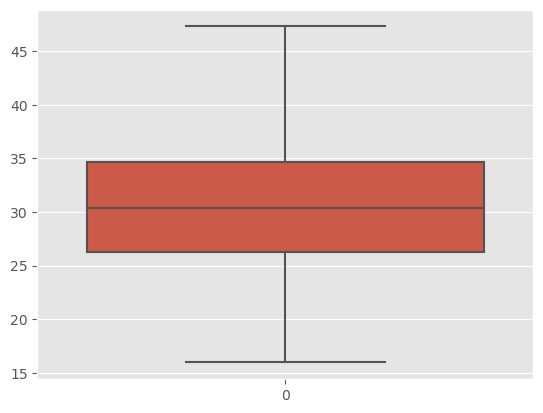

In [22]:
sns.boxplot(df['bmi'])

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df['bmi'].skew()
df['age'].skew()

0.054780773126998195

In [25]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [26]:
df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [27]:
df['region'] = df['region'].map({'northwest': 0, 'northeast': 1, 'southwest': 2, 'southeast': 3})

In [28]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,-0.006691,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.017150,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.261154,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.020206,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.053454,0.787234
region,-0.006691,-0.017150,0.261154,-0.020206,0.053454,1.000000,0.056070
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.056070,1.000000


In [29]:
X = df.drop(['charges'], axis = 1)
y = df[['charges']]
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor


In [30]:
l1 = []
l2 = []
l3=  []
cvs = 0


In [31]:
for i in range(40, 50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    lrmodel = LinearRegression()
    lrmodel.fit(X_train, y_train)
    l1.append(lrmodel.score(X_train, y_train))
    l2.append(lrmodel.score(X_test, y_test))
    cvs = (cross_val_score(lrmodel, X, y, cv=5)).mean()
    l3.append(cvs)
    df1 = pd.DataFrame({'train_acc': l1, 'test_acc': l2, 'cvs': l3})

In [32]:
df1

,train_acc,test_acc,cvs
0,0.741539,0.779138,0.747
1,0.756756,0.704260,0.747
2,0.729648,0.806362,0.747
3,0.753997,0.734113,0.747
4,0.742804,0.780840,0.747
5,0.753137,0.732727,0.747
6,0.741612,0.775969,0.747
7,0.732525,0.794691,0.747
8,0.751989,0.741911,0.747
9,0.756583,0.721869,0.747


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
print(lrmodel.score(X_train, y_train))
print(lrmodel.score(X_test, y_test))
print(cross_val_score(lrmodel, X, y, cv=5).mean())

0.7296475807576607
0.8063624710782458
0.7469996197062543


In [34]:
from sklearn.metrics import r2_score
svrmodel = SVR()
svrmodel.fit(X_train, y_train)
ypredtrain1 = svrmodel.predict(X_train)
ypredtest1 = svrmodel.predict(X_test)

C:\Users\vince\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
print(r2_score(y_train, ypredtrain1))
print(r2_score(y_test, ypredtest1))
print(cross_val_score(svrmodel, X, y, cv=5).mean())

-0.1015150418030557
-0.13444586959905647


C:\Users\vince\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

-0.10374692104571026


C:\Users\vince\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
rfmodel  = RandomForestRegressor(random_state = 42)
rfmodel.fit(X_train, y_train)
ypredtrain2 = rfmodel.predict(X_train)
ypredtest2 = rfmodel.predict(X_test)
print(r2_score(y_train, ypredtrain2))
print(r2_score(y_test, ypredtest2))
print(cross_val_score(rfmodel, X, y, cv=5).mean())

C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9739337992698777
0.8797402284668216


C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

0.8368492823523981


In [37]:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor(random_state = 42)
param_grid = {'n_estimators': [10, 40, 50, 98, 100,  120, 150]}
grid = GridSearchCV(estimator, param_grid, scoring = "r2", cv = 5)
grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

{'n_estimators': 98}


In [38]:
rfmodel = RandomForestRegressor(random_state = 42, n_estimators = 98)
rfmodel.fit(X_train, y_train)
ypredtrain2 = rfmodel.predict(X_train)
ypredtest2 = rfmodel.predict(X_test)
print(r2_score(y_train, ypredtrain2))
print(r2_score(y_test, ypredtest2))
print(cross_val_score(rfmodel, X, y, cv=5).mean())

C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9737482927504374
0.8800648670590465


C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

0.8366462352498589


In [39]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(X_train,y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel,X,y,cv=5,).mean())

C:\Users\vince\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was p

{'learning_rate': 0.19, 'n_estimators': 21}
0.8682397447116927
0.9017109716082662


C:\Users\vince\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\vince\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was p

0.8605809513202344


In [40]:
xgmodel=XGBRegressor()
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5,).mean())

0.9954190850257874
0.8574210405349731
0.808076810836792


In [41]:
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5,).mean())

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8700755834579468
0.9024454355239868
0.860581123828888


In [42]:
features_important = pd.DataFrame(data = grid.best_estimator_.feature_importances_, index = X.columns, columns = ['Importance'])

In [43]:
features_important


,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [44]:
important_features = features_important[features_important['Importance'] > 0.01]

In [45]:
important_features

,Importance
age,0.038633
bmi,0.133449
children,0.011073
smoker,0.809626


In [46]:
df.drop(df[['sex', 'region']], axis = 1, inplace=True)
Xf = df.drop(df[['charges']], axis =1)
X = df.drop(df[['charges']], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size = 0.2, random_state = 42)

In [47]:
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(X_train,y_train)
ypredtrain4=finalmodel.predict(X_train)
ypredtest4=finalmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(finalmodel,X,y,cv=5,).mean())

0.8691051602363586
0.9007425308227539
0.8606266975402832


In [48]:
import pickle
pickle.dump(finalmodel, open("model.pkl", "wb"))

In [49]:
new_data=pd.DataFrame({'age':19,'sex':'female','bmi':25.9,'children':3,'smoker':'no','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([6379.257], dtype=float32)